In [1]:
#sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[0])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# libraries
import pandas as pd
import numpy as np

import scipy.linalg
import matplotlib.pyplot as plt

from gp_regression import GPR
from gp_ccopf import GP_CCOPF
import save_outputs
import time

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# DataSet

In [2]:
# Data Set

df = pd.read_csv('datasets\dataset_pandapower.csv')
df.head()

,Unnamed: 0,Pg0,Pg1,Pg2,Load_P1,Load_P2,Load_P3,Load_Q1,Load_Q2,Load_Q3,RS_P1,RS_P2,RS_Q1,RS_Q2,P0,P1,P2,P3,P4,P5,P6,P7,P8,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,U0,U1,U2,U3,U4,U5,U6,U7,U8,Ud0,Ud1,Ud2,Ud3,Ud4,Ud5,Ud6,Ud7,Ud8,P_03,P_34,P_45,P_25,P_56,P_67,P_71,P_78,P_83
0,0,59.133076,91.046121,58.858774,77.773848,82.096546,109.642025,25.924616,28.733791,43.856810,33.596406,29.744812,10.078922,9.914937,-58.856484,-91.046121,-58.858774,-33.596406,77.773848,-29.744812,82.096546,0.0,109.642025,2.350474,6.317373,23.605955,-10.078922,25.924616,-9.914937,28.733791,0.0,43.856810,1.0,1.0,1.0,1.001928,0.994936,1.014420,1.000038,1.005560,0.979805,0.0,3.157380,2.631294,-1.939037,-3.667944,0.682807,-1.691738,-0.086676,-4.767008,58.856484,33.060233,-44.899384,58.858774,42.909810,-39.411861,-91.046121,51.501723,-58.999419
1,1,66.599881,157.267682,92.238488,102.301461,104.046287,142.384024,34.100487,36.416200,56.953609,19.325453,17.635380,5.797636,5.878460,-68.289225,-157.267682,-92.238488,-19.325453,102.301461,-17.635380,104.046287,0.0,142.384024,-28.625599,-17.542616,4.402647,-5.797636,34.100487,-5.878460,36.416200,0.0,56.953609,1.0,1.0,1.0,0.984298,0.968655,1.004036,0.983771,0.993908,0.948376,0.0,9.338553,6.098185,-2.290268,-3.989830,3.012205,0.894783,3.663024,-4.928414,68.289225,32.793857,-69.718053,92.238488,38.135506,-66.114022,-157.267682,90.768012,-54.374524
2,2,79.074452,134.389013,64.829596,95.968023,108.666208,136.360049,31.989341,38.033173,54.544020,38.277040,28.240721,11.483112,9.413574,-79.420587,-134.389013,-64.829596,-38.277040,95.968023,-28.240721,108.666208,0.0,136.360049,-14.588350,-10.672416,11.381477,-11.483112,31.989341,-9.413574,38.033173,0.0,54.544020,1.0,1.0,1.0,0.992652,0.979386,1.007386,0.985971,0.996875,0.959738,0.0,5.010390,1.913795,-2.641406,-5.103047,-0.247433,-2.591240,0.177119,-6.083925,79.420587,46.620172,-49.730510,64.829596,42.331427,-66.579714,-134.389013,67.419083,-70.460191
3,3,49.510102,110.728146,72.459392,73.641679,89.800681,112.311358,24.547226,31.430238,44.924543,23.375186,22.872133,7.012556,7.624044,-49.481764,-110.728146,-72.459392,-23.375186,73.641679,-22.872133,89.800681,0.0,112.311358,-2.964563,1.712063,19.577410,-7.012556,24.547226,-7.624044,31.430238,0.0,44.924543,1.0,1.0,1.0,0.998699,0.992960,1.012363,0.996245,1.003459,0.975007,0.0,5.757109,4.653073,-1.635364,-2.799237,2.249231,-0.125910,1.802480,-4.028748,49.481764,22.324345,-51.403202,72.459392,42.880168,-47.150686,-110.728146,63.385933,-50.224048
4,4,74.088754,104.415714,69.420999,86.981422,87.469644,129.760427,28.993807,30.614375,51.904171,28.081316,31.604788,8.424395,10.534929,-74.322851,-104.415714,-69.420999,-28.081316,86.981422,-31.604788,87.469644,0.0,129.760427,-10.644654,-1.099562,18.777980,-8.424395,28.993807,-10.534929,30.614375,0.0,51.904171,1.0,1.0,1.0,0.994790,0.985441,1.011822,0.995288,1.001441,0.965592,0.0,3.763322,3.242836,-2.466437,-4.250579,0.938615,-1.657588,0.026943,-5.770507,74.322851,33.978340,-53.204661,69.420999,46.684088,-41.055929,-104.415714,63.214346,-67.873473


In [3]:
df.describe()

,Unnamed: 0,Pg0,Pg1,Pg2,Load_P1,Load_P2,Load_P3,Load_Q1,Load_Q2,Load_Q3,RS_P1,RS_P2,RS_Q1,RS_Q2,P0,P1,P2,P3,P4,P5,P6,P7,P8,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,U0,U1,U2,U3,U4,U5,U6,U7,U8,Ud0,Ud1,Ud2,Ud3,Ud4,Ud5,Ud6,Ud7,Ud8,P_03,P_34,P_45,P_25,P_56,P_67,P_71,P_78,P_83
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,67.327486,107.848401,75.875898,90.221254,100.259705,125.682814,30.073751,35.090897,50.273126,42.706655,25.848284,12.811996,8.616095,-67.515772,-107.848401,-75.875898,-42.706655,90.221254,-25.848284,100.259705,0.0,125.682814,-6.920674,-3.810360,14.531825,-12.811996,30.073751,-8.616095,35.090897,0.0,50.273126,1.0,1.000000e+00,1.000000e+00,0.996801,0.984939,1.009530,0.990568,0.999966,0.968099,0.0,3.601079,3.052184,-2.237970,-4.361274,0.526459,-2.313586,-0.266610,-5.591898,67.515772,40.641524,-49.880639,75.875898,50.807165,-49.786940,-107.848401,57.833971,-69.003845
std,288.819436,12.647903,18.946129,14.004948,9.889566,11.017076,13.874682,3.296522,3.855977,5.549873,15.501674,9.460812,4.650502,3.153604,12.796164,18.946129,14.004948,15.501674,9.889566,9.460812,11.017076,0.0,13.874682,10.668511,7.601784,6.515294,4.650502,3.296522,3.153604,3.855977,0.0,5.549873,0.0,1.376649e-16,1.349493e-16,0.005914,0.008708,0.003520,0.006172,0.004048,0.010736,0.0,1.690159,1.334089,0.434502,0.705986,1.067584,1.105898,1.174581,0.806701,12.796164,7.712058,8.622159,14.004948,8.411371,9.769679,18.946129,11.182085,9.852687
min,0.000000,26.322199,51.043491,34.186272,64.309277,66.196950,85.509333,21.436426,23.168932,34.203733,11.696795,8.225015,3.509038,2.741672,-116.034781,-176.123871,-128.981432,-103.093129,64.309277,-67.193581,66.196950,0.0,85.509333,-43.147517,-36.757346,-8.961267,-30.927939,21.436426,-22.397860,23.168932,0.0,34.203733,1.0,1.000000e+00,1.000000e+00,0.977435,0.954689,0.996207,0.965463,0.983208,0.928912,0.0,-1.508188,-0.923433,-3.920889,-7.269772,-2.779214,-5.626530,-3.790543,-8.550465,26.708616,21.184333,-76.866725,34.186272,30.474415,-91.002774,-176.123871,22.051236,-102.581335
25%,249.750000,58.523253,95.176695,66.586935,83.329053,92.669152,116.211957,27.776351,32.434203,46.484783,31.392448,18.943681,9.417734,6.314560,-76.259659,-120.464337,-84.842674,-51.449087,83.329053,-30.885578,92.669152,0.0,116.211957,-14.092572,-8.676556,10.022007,-15.434726,27.776351,-10.295193,32.434203,0.0,46.484783,1.0,1.000000e+00,1.000000e+00,0.992880,0.979570,1.007118,0.986466,0.997292,0.961025,0.0,2.417299,2.101303,-2.528367,-4.821312,-0.247683,-3.081443,-1.105484,-6.085577,58.627945,35.312455,-55.406248,66.586935,44.813968,-56.242033,-120.464337,50.402460,-74.917962
50%,499.500000,66.350782,106.651498,75.616361,90.024514,99.641952,125.149306,30.008171,34.874683,50.059722,39.966311,24.253107,11.989893,8.084369,-66.731154,-106.651498,-75.616361,-39.966311,90.024514,-24.253107,99.641952,0.0,125.149306,-6.821836,-3.229145,14.855114,-11.989893,30.008171,-8.084369,34.874683,0.0,50.059722,1.0,1.000000e+00,1.000000e+00,0.996784,0.985330,1.009654,0.991034,1.000289,0.968775,0.0,3.581474,2.970875,-2.207402,-4.314902,0.498588,-2.293111,-0.254460,-5.520943,66.731154,40.271385,-49.640467,75.616361,50.104902,-49.228098,-106.651498,57.655299,-68.282817
75%,749.250000,75.858453,120.464337,84.842674,96.534155,107.309033,135.113908,32.178052,37.558161,54.045563,51.449087,30.885578,15.434726,10.295193,-58.627945,-95.176695

In [4]:
def _get_x(df):
    X = df[['Pg0', 'Pg1', 'Pg2', 'Load_P1', 'Load_P2', 'Load_P3', 'RS_P1', 'RS_P2']]
    return X 


def _get_y(df):
    y = df[['U3','U4', 'U5', 'U6', 'U7', 'U8', 
            'Q0', 'Q1', 'Q2', 
            'P_34', 'P_45', 'P_56', 'P_67', 'P_78' , 'P_83',
            ]]
    return y 


X = _get_x(df)
Y = _get_y(df)

Y[['U3','U4','U5', 'U6', 'U7', 'U8']] = Y[['U3','U4','U5', 'U6', 'U7', 'U8']]*345

c:\users\mile\python\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [5]:
Nu = 3
Nd = 5

n_train = 75
n_test = n_train + 25

X_train = X.iloc[:n_train]  
Y_train = Y.iloc[:n_train]
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()


X_test = X.iloc[n_train:n_test]
Y_test = Y.iloc[n_train:n_test]
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

# GP - Train and Save model

In [6]:
model = 1


print('*****************')
print('GP')
print('*****************')

#Train
if model==0:
    gp = GPR(X_train, Y_train, normalize=True)
    gp.save_model('models/IEEE9')

#Load    
elif model==1:
    gp = GPR.load_model('models/IEEE9')


print('*****************')
print('Hyper_parameters')
print('*****************')
gp.print_hyper_parameters()

*****************
GP
*****************
*****************
Hyper_parameters
*****************

________________________________________
# Hyper-parameters
----------------------------------------
* Num samples: 75
* Ny: 15
* Nx: 8
* Normalization: True
----------------------------------------
* Lengthscale:  0
-- l0: 25.59306270029756
-- l1: 18.8711811013361
-- l2: 25.2567805729107
-- l3: 39.039588512608894
-- l4: 48.334829222034585
-- l5: 27.766903122730994
-- l6: 23.016895237192436
-- l7: 33.33310829850299
* Signal variance:  0
-- sf2: 13.71533782461152
* Noise variance:  0
-- sn2: 3.185870779626576e-08
----------------------------------------
* Lengthscale:  1
-- l0: 25.72782304081317
-- l1: 20.0014435026094
-- l2: 24.200701247529675
-- l3: 14.00049935962437
-- l4: 44.044341319689465
-- l5: 41.10014381119467
-- l6: 27.907001999943812
-- l7: 28.88106300139309
* Signal variance:  1
-- sf2: 20.484833158446733
* Noise variance:  1
-- sn2: 1.4616316889123856e-09
---------------------------

# GP - Validation

In [8]:
print('*****************')
print('Validation - Validation Data')
print('*****************')


RMSE = gp.validate(X_test, Y_test, case='IEEE9')
print('RMSE:', np.mean(RMSE))
print('RMSE_u:', np.mean(RMSE[:6]))
print('RMSE_q:', np.mean(RMSE[6:9]))
print('RMSE_p:', np.mean(RMSE[9:15]))

*****************
Validation - Validation Data
*****************

________________________________________
# Validation of GP model 
----------------------------------------
* Num training samples: 75
* Num test samples: 25
----------------------------------------
* Root Mean Squared Error: 
	- State 1: 0.000006
	- State 2: 0.000010
	- State 3: 0.000005
	- State 4: 0.000008
	- State 5: 0.000009
	- State 6: 0.000024
	- State 7: 0.000213
	- State 8: 0.000161
	- State 9: 0.000076
	- State 10: 0.000060
	- State 11: 0.000058
	- State 12: 0.000051
	- State 13: 0.000131
	- State 14: 0.000135
	- State 15: 0.000212
----------------------------------------
RMSE: 7.722692341279601e-05
RMSE_u: 1.0320153773153642e-05
RMSE_q: 0.00015008444565319556
RMSE_p: 0.0001077049319322386


# Input parameters

In [8]:
# Input mean
Xd = np.array([[ 90.,  100., 125., 50, 30]])

# Participation factors
alpha = np.array([[0.313, 0.405, 0.281]]).T

# Costs
R = np.eye(Nu) * [0.1100, 0.0850, 0.1225]
R2 = np.ones(Nu) * [5, 1.2, 1]

# Control boundaries
ulb = [ 10,  10,  10]
uub = [250, 300, 270]

# Output boundaries
xlb = [310.5, 310.5, 310.5, 310.5, 310.5, 310.5, -100, -100, -100, -200,  -200, -200, -200, -200, -200]
xub = [379.5, 379.5, 379.5, 379.5, 379.5, 379.5,  100,  100,  100,  200,   200,  200,  200,  200,  200]

# Percentages
per_load = 0.15 
per_rs   = 0.3 
n_load   = 3

# Approximation models

## TA1

In [9]:
gp_opf_TA1 = GP_CCOPF(gp=gp, gp_method='TA1', predefine_probability_y=0.975, predefine_probability_u=0.999,
                      R=R, R2=R2, ulb=ulb, uub=uub, xlb=xlb, xub=xub, solver_opts=None, normalize=True,
                      X=X_train, Y=Y_train, Xd=Xd, alpha=alpha, per_load=per_load, per_rs=per_rs, n_load=n_load)        

----------------------------------------
# Time to build GP CCOPF solver: 0.433107 sec


In [10]:
u_TA1, alpha_TA1, x_TA1, s_TA1, trace_covar_TA1, Xd_std = gp_opf_TA1.solve()

# Save outputs
gp_save = 0

if gp_save == 0:
    IEEE_dict = save_outputs.to_dict(x_TA1, s_TA1, u_TA1, alpha_TA1, trace_covar_TA1)
    save_outputs.save_model(IEEE_dict, 'outputs\IEEE9_TA1')


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:       36
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       32
Total number of inequality constraints...............:       54
        inequality constraints with only lower bounds:       36
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       18


Number of Iterations....: 16

    

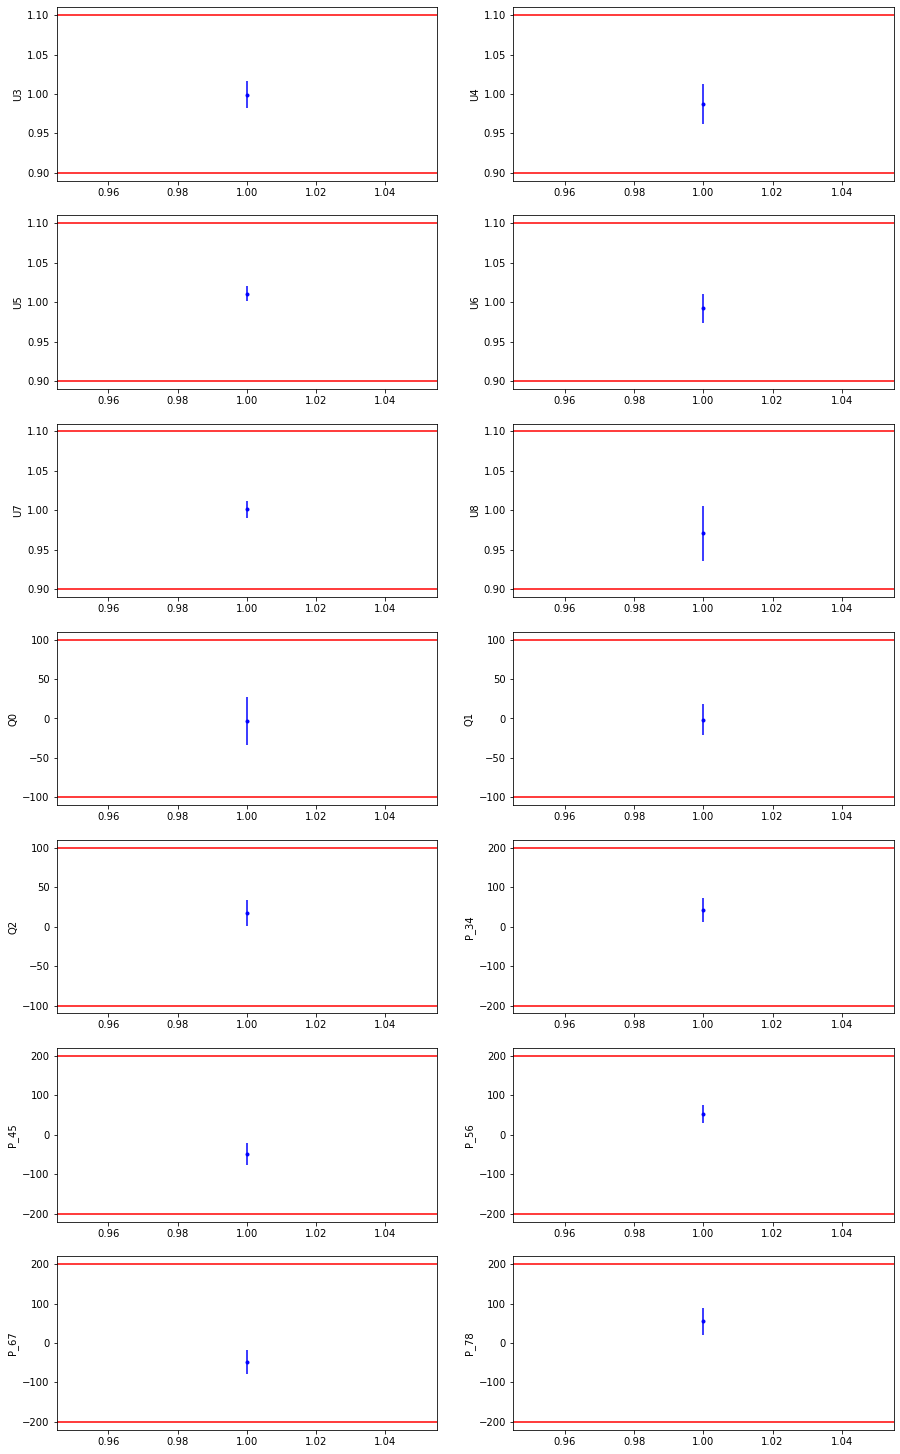

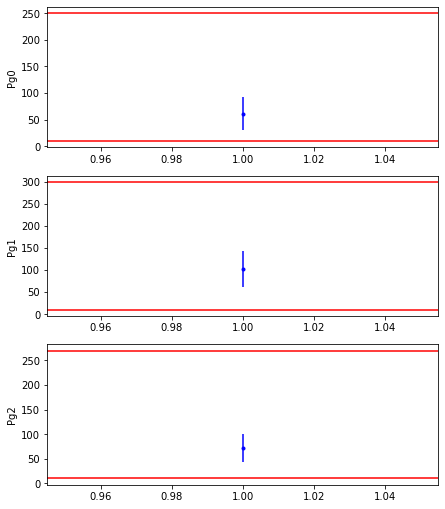

In [11]:
# Save inputs
gp_in_save = 0

if gp_in_save == 0:
    IEEE_dict_in = save_outputs.to_dict_in(Xd, Xd_std, u_TA1, alpha_TA1)
    save_outputs.save_model(IEEE_dict_in, 'IEEE9 - pandapower\inputs\IEEE9_TA1')


x_names = ['U3','U4', 'U5', 'U6', 'U7', 'U8', 
           'Q0', 'Q1', 'Q2', 
           'P_34', 'P_45', 'P_56', 'P_67', 'P_78' , 'P_83']
u_names = ['Pg0', 'Pg1', 'Pg2']

gp_opf_TA1.plot(x_names=x_names, u_names=u_names, vol_nom=345, x_w=15, x_h=30, u_w=7, u_h=15)

## TA2

In [12]:
gp_opf_TA2 = GP_CCOPF(gp=gp, gp_method='TA2', predefine_probability_y=0.975, predefine_probability_u=0.999,
                      R=R, R2=R2, ulb=ulb, uub=uub, xlb=xlb, xub=xub, solver_opts=None, normalize=True,
                      X=X_train, Y=Y_train, Xd=Xd, alpha=alpha, per_load=per_load, per_rs=per_rs, n_load=n_load)        

----------------------------------------
# Time to build GP CCOPF solver: 1.135966 sec


In [13]:
u_TA2, alpha_TA2, x_TA2, s_TA2, trace_covar_TA2, _ = gp_opf_TA2.solve()

# Save outputs
gp_save = 0

if gp_save == 0:
    IEEE_dict = save_outputs.to_dict(x_TA2, s_TA2, u_TA2, alpha_TA2, trace_covar_TA2)
    save_outputs.save_model(IEEE_dict, 'outputs\IEEE9_TA2')

Total number of variables............................:       36
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       32
Total number of inequality constraints...............:       54
        inequality constraints with only lower bounds:       36
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       18


Number of Iterations....: 14

                                   (scaled)                 (unscaled)
Objective...............:  1.4162666898336813e+003   2.4772422260764397e+003
Dual infeasibility......:  1.7763568394002505e-015   3.1070886597345250e-015
Constraint violation....:  0.0000000000000000e+000   0.0000000000000000e+000
Complementarity.........:  1.0000971868308205e-011   1.7493054092012212e-011
Overall NLP e

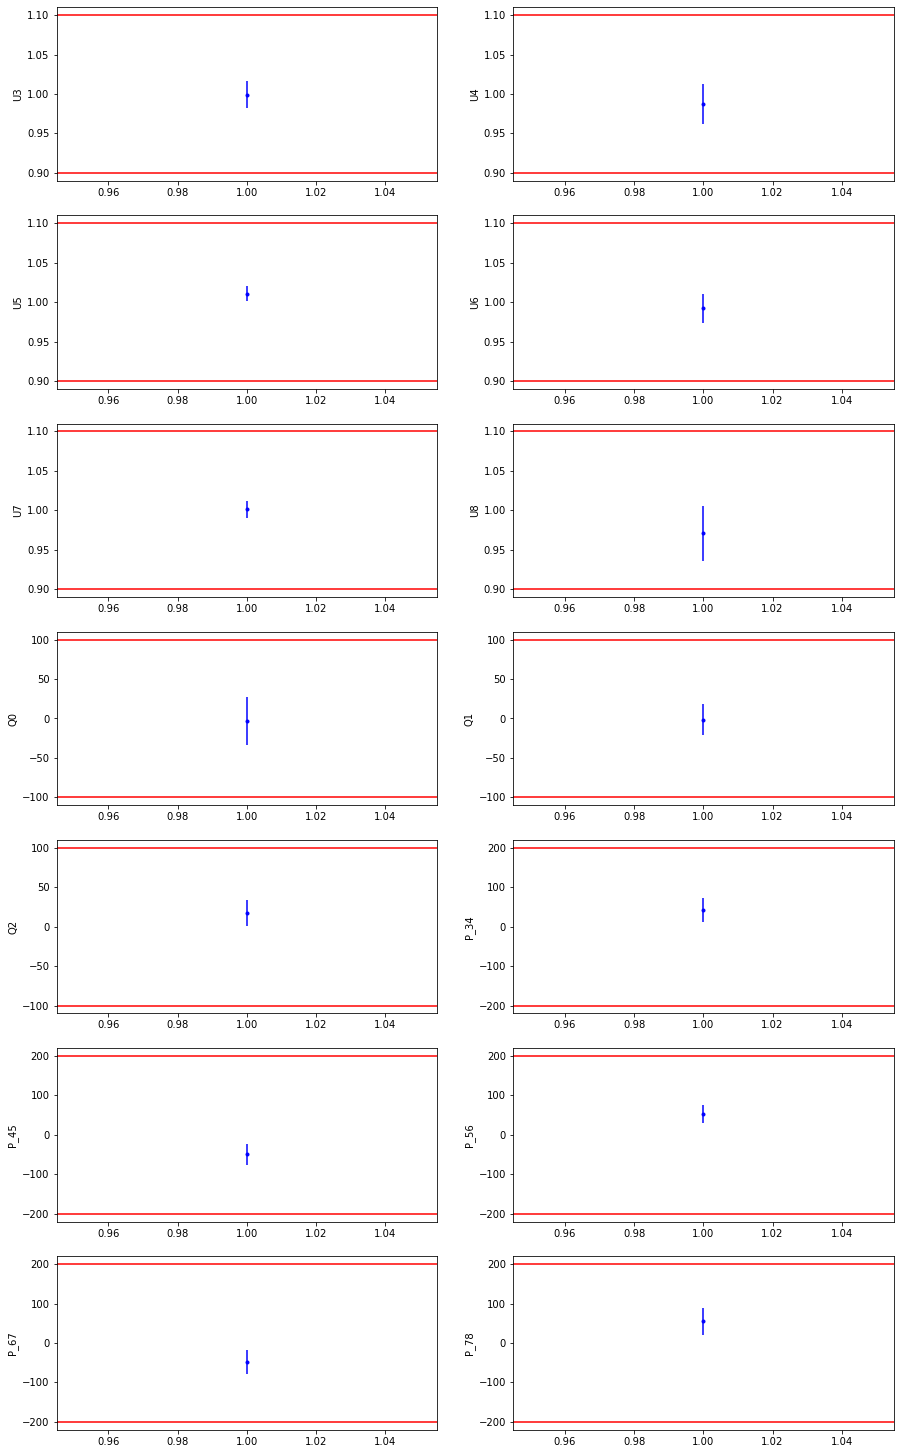

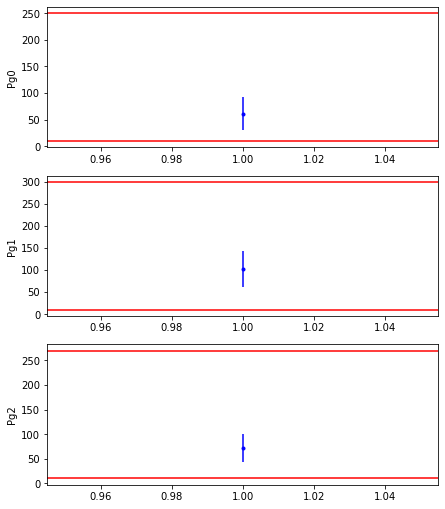

In [14]:
x_names = ['U3','U4', 'U5', 'U6', 'U7', 'U8', 
           'Q0', 'Q1', 'Q2', 
           'P_34', 'P_45', 'P_56', 'P_67', 'P_78' , 'P_83']
u_names = ['Pg0', 'Pg1', 'Pg2']

gp_opf_TA2.plot(x_names=x_names, u_names=u_names, vol_nom=345, x_w=15, x_h=30, u_w=7, u_h=15)

## EM

In [15]:
gp_opf_EM = GP_CCOPF(gp=gp, gp_method='EM', predefine_probability_y=0.975, predefine_probability_u=0.999,
                      R=R, R2=R2, ulb=ulb, uub=uub, xlb=xlb, xub=xub, solver_opts=None, normalize=True,
                      X=X_train, Y=Y_train, Xd=Xd, alpha=alpha, per_load=per_load, per_rs=per_rs, n_load=n_load)        

----------------------------------------
# Time to build GP CCOPF solver: 0.507086 sec


In [16]:
u_EM, alpha_EM, x_EM, s_EM, trace_covar_EM, _ = gp_opf_EM.solve()

# Save outputs
gp_save = 0

if gp_save == 0:
    IEEE_dict = save_outputs.to_dict(x_EM, s_EM, u_EM, alpha_EM, trace_covar_EM)
    save_outputs.save_model(IEEE_dict, 'outputs\IEEE9_EM')

Total number of variables............................:       36
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       32
Total number of inequality constraints...............:       54
        inequality constraints with only lower bounds:       36
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       18


Number of Iterations....: 16

                                   (scaled)                 (unscaled)
Objective...............:  1.4162666898336813e+003   2.4772422260764397e+003
Dual infeasibility......:  1.0000000000007026e-016   1.7491354162746666e-016
Constraint violation....:  0.0000000000000000e+000   0.0000000000000000e+000
Complementarity.........:  1.0000000000000003e-011   1.7491354162734381e-011
Overall NLP e

CasADi -  WARNING("solver:nlp_grad failed: NaN detected for output grad_gamma_p, at (row 33, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi -  WARNING("Failed to calculate multipliers") [.../casadi/core/nlpsol.cpp:606]


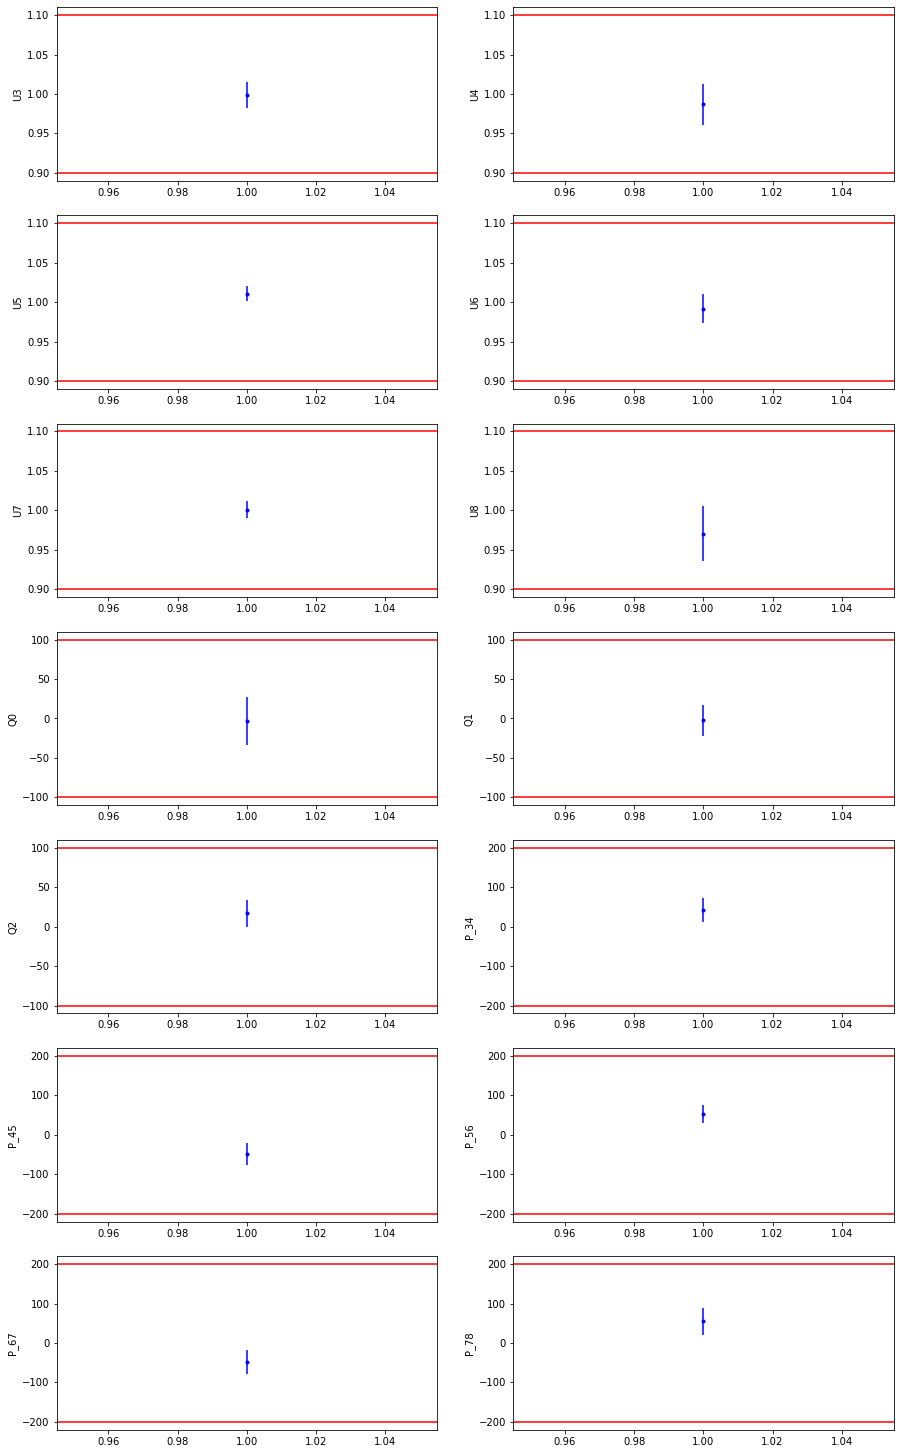

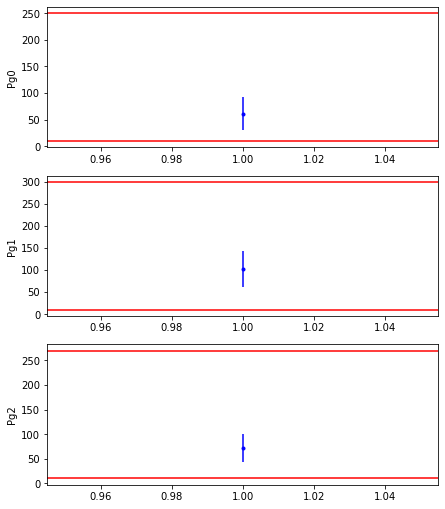

In [17]:
x_names = ['U3','U4', 'U5', 'U6', 'U7', 'U8', 
           'Q0', 'Q1', 'Q2', 
           'P_34', 'P_45', 'P_56', 'P_67', 'P_78' , 'P_83']
u_names = ['Pg0', 'Pg1', 'Pg2']

gp_opf_EM.plot(x_names=x_names, u_names=u_names, vol_nom=345, x_w=15, x_h=30, u_w=7, u_h=15)